# Marshall MRMS Mosaic Python Toolkit (MMM-Py)

<u><b>Author</b></u><br>
Timothy J. Lang<br>
Research AST, Atmospheric Measurements<br>
Earth Science Office (ZP11)<br>
NASA Marshall Space Flight Center<br>
Huntsville, AL 35812<br>
+1 (256) 961-7861<br>
timothy.j.lang@nasa.gov

Date: 2/17/2015
<hr>

MMM-Py is an open-source, object-oriented software toolkit written in Python. It's primary purpose is to facilitate rapid ingest, visualization, and analysis of NOAA's Multi-Radar/Multi-Sensor System (MRMS) three-dimensional national radar mosaics. These mosaics, while extremely useful for scientific research, are distributed as separate tiles covering different regions of the United States. They also update and change format frequently. MMM-Py aims to get the most out of scientific analysis of these mosaics while making transparent to the end user much of the work of ingesting and stitching together many different mosaics into a common data model. It is meant to empower the radar scientist and save them valuable time.

MMM-Py is currently distributed as a pseudo-package, a single file of code that can be placed somewhere in your PYTHONPATH and imported like any other module. It was developed using Python 2.7, and makes use of numpy, scipy, matplotlib, Basemap, time, and os. Let's get started with a brief overview and demonstration.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import mmmpy

/Users/tjlang/anaconda/lib/python2.7/site-packages/mpl_toolkits/__init__.py:2: UserWarning: Module argparse was already imported from /Users/tjlang/anaconda/lib/python2.7/argparse.pyc, but /Users/tjlang/anaconda/lib/python2.7/site-packages is being added to sys.path
  __import__('pkg_resources').declare_namespace(__name__)


The workhorses of MMM-Py are two Python classes, MosaicTile and MosaicStitch. MosaicTile instances are used to read in individual NetCDF MRMS mosaic tile files. Before late 2013, national mosaics were broken up into 8 tiles. For MMM-Py, reading them in is as simple as initializing the MosaicTile class with the full path and filename for each tile. For example:

In [2]:
path = '/Users/tjlang/Documents/Python/DataForTesting/'
tile1a = mmmpy.MosaicTile(path + '20130601/mosaic3d_tile1_20130601-020000.netcdf', 
                          verbose=True)
tile2a = mmmpy.MosaicTile(path + '20130601/mosaic3d_tile2_20130601-020000.netcdf')
tile3a = mmmpy.MosaicTile(path + '20130601/mosaic3d_tile3_20130601-020000.netcdf')
tile4a = mmmpy.MosaicTile(path + '20130601/mosaic3d_tile4_20130601-020000.netcdf')
tile5a = mmmpy.MosaicTile(path + '20130601/mosaic3d_tile5_20130601-020000.netcdf')
tile6a = mmmpy.MosaicTile(path + '20130601/mosaic3d_tile6_20130601-020000.netcdf')
tile7a = mmmpy.MosaicTile(path + '20130601/mosaic3d_tile7_20130601-020000.netcdf')
tile8a = mmmpy.MosaicTile(path + '20130601/mosaic3d_tile8_20130601-020000.netcdf')


********************
read_mosaic_binary():
Reading /Users/tjlang/Documents/Python/DataForTesting/20130601/mosaic3d_tile1_20130601-020000.netcdf
Not an MRMS binary file
********************


********************
read_mosaic_netcdf():
read_mosaic_netcdf(): Reading /Users/tjlang/Documents/Python/DataForTesting/20130601/mosaic3d_tile1_20130601-020000.netcdf
Task complete, data contained as class attributes
Use dir(), help(), or __dict__ to find out what is available
********************



Note the ability to set a verbose flag if you need it for debugging purposes. Otherwise MMM-Py won't spit out much text unless there is an error. It usually takes a few seconds per tile for ingest. When a MosaicTile is instantiated with a file and the binary flag is set to False, MMM-Py will call the read_mosaic_netcdf() method. Alternatively, you could just instantiate the class without passing a file name, and then you can call read_mosaic_netcdf() later to populate the attributes. Python has a lot of different NetCDF interface modules, but I found the one in scipy to work the fastest, so MMM-Py uses that in read_mosaic_netcdf(). 

Anyway, let's look at Tile 6. This covers the south central United States (20-40 N, 110-90 W). The El Reno storm was occurring in Oklahoma on this date (6/1/2013, 0200 UTC), so there will be something to see. To get a quick look at a tile, use the diag() method.


********************
diag():
Printing basic metadata and making a simple plot
Data are from mosaic3d_tile6_20130601-020000.netcdf
Min, Max Latitude = 20.000000447 40.0
Min, Max Longitude = -110.0 -90.000000447
Heights (km) = [  0.5    0.75   1.     1.25   1.5    1.75   2.     2.25   2.5    2.75   3.
   3.5    4.     4.5    5.     5.5    6.     6.5    7.     7.5    8.     8.5
   9.    10.    11.    12.    13.    14.    15.    16.    18.  ]
Grid shape = (31, 2001, 2001)
Now plotting ...

********************
plot_horiz():
Executing plot
No vertical level specified, plotting composite reflectivity
mrefl3d_comp does not exist, computing it with get_comp()

********************
get_comp():
Computing composite field
********************

********************

Done!
********************



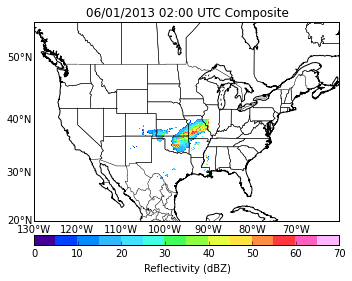

In [3]:
tile6a.diag(verbose=True)

diag() does a few things. It spits out metadata, then does a quick horizontal plot. The plot_horiz() routine (contained within the MosaicDisplay class - more on that later) does this via Basemap and matplotlib.pyplot.contourf(). If plot_horiz() is called without specifying a vertical level (as in diag), it will compute composite reflectivity with get_comp() and plot that. We'll explore plot_horiz() more later, but note the gridlines, which indicate the boundaries of what MMM-Py calls the Version 1 (pre late July 2013) and Version 2 (post late July 2013) MRMS mosaic tiles. Note how the reflectivity from the El Reno storm stops at 40 N, and 90 W. We'll explore how to expand our view later. 

For now, what attributes and methods are in this MosaicTile class? 

In [4]:
dir(tile6a)

['Duration',
 'Filename',
 'Height',
 'LatGridSpacing',
 'Latitude',
 'LonGridSpacing',
 'Longitude',
 'StartLat',
 'StartLon',
 'Tile',
 'Time',
 'Variables',
 'Version',
 '__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_construct_1d_data',
 '_construct_dtype',
 '_construct_header',
 '_get_tile_number',
 '_populate_v1_specific_data',
 '_populate_v2_specific_data',
 '_subsection_data3d',
 '_subsection_in_height',
 '_subsection_in_latitude',
 '_subsection_in_longitude',
 'diag',
 'get_comp',
 'help',
 'mrefl3d',
 'mrefl3d_comp',
 'nlat',
 'nlon',
 'nz',
 'output_composite',
 'read_mosaic_binary',
 'read_mosaic_grib',
 'read_mosaic_netcdf',
 'subsection',
 'write_mosaic_binary']

Besides the usual Python private attributes and methods, we see a lot of other things. Some of these names might be familiar to current users of MRMS mosaics. What's in these attributes?

In [5]:
print(tile6a.Filename)
print(tile6a.Version)
print(tile6a.Variables)
print(tile6a.nlat, tile6a.nlon, tile6a.nz)
print(tile6a.StartLat, tile6a.StartLon, tile6a.LatGridSpacing, tile6a.LonGridSpacing)
print(tile6a.Time, tile6a.Duration)

mosaic3d_tile6_20130601-020000.netcdf
1
['mrefl3d']
(2001, 2001, 31)
(40.0, -110.0, 0.0099999998, 0.0099999998)
(1370052000.0, 300.0)


Most of these are pretty obvious, but some notes before moving on. Version 1 means these are pre late July 2013 mosaics. They contain the mrefl3d 3-D mosaic reflectivity. Note how starting latitude is northernmost border, while starting longitude is westernmost border. MMM-Py keeps these grid characteristics constant no matter what tiles you read in and stitch together. Time and Duration give epoch time (seconds since 1/1/1970) and the number of seconds for which the mosaic is valid (5 minutes in Version 1). Python has really nice tools for translating between UTC date and time and epoch time, so the Time attribute will be really useful for combining mosaics with other data (e.g., lightning).

Latitude and Longitude are provided on a 2-D grid, and mrefl3d_comp is the 2-D composite reflectivity field we calculated earlier with the get_comp() method. Once calculated, the composite field is kept as part of the data model. Height is the 1-D list of heights in the mosaic. Version 1 tiles have 31 levels.

### MosaicDisplay class

OK, MMM-Py also contains the MosaicDisplay class, which enables plotting various slices of the data Let's see what its methods can do.

In [6]:
display = mmmpy.MosaicDisplay(tile6a)
help(display.plot_horiz)

Help on method plot_horiz in module mmmpy:

plot_horiz(self, var='mrefl3d', latrange=[20, 55], lonrange=[-130, -60], resolution='l', level=None, parallels=10, area_thresh=10000, meridians=10, title=None, clevs=array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,... 40.,  45.,  50.,
        55.,  60.,  65.,  70.]), cmap=<matplotlib.colors.LinearSegmentedColormap object>, save=None, show_grid=True, linewidth=0, fig=None, ax=None, verbose=False, return_flag=False, colorbar_flag=True) method of mmmpy.MosaicDisplay instance
    Plots a basemap projection with a plan view of the mosaic radar data.
    The projection can be used to incorporate other data into figure
    (e.g., lightning).
    var = Variable to be plotted.
    latrange = Desired latitude range of plot (2-element list).
    lonrange = Desired longitude range of plot (2-element list).
    level = If set, performs horizontal cross-section thru that altitude,
            or as close as possible to it. If not set, will plot composite.


So, the default is those national-size maps, but plot range is totally adjustable. You can also adjust the color map, contour levels, the vertical level plotted, whether gridlines show up and how closely spaced they are, you can change the title, the variable plotted (not relevant until dual-pol NEXRAD data start showing up, say in later mosaic versions), and whether or not you'd like to save the image as a file. Note also that the Figure, Axis, and Basemap instances can be returned by this method, so you can use them to overplot other data if desired.


********************
plot_horiz():
Executing plot
Attempting to plot cross-section thru 4.1 km MSL
Actually taking cross-section thru 4.0 km MSL
********************



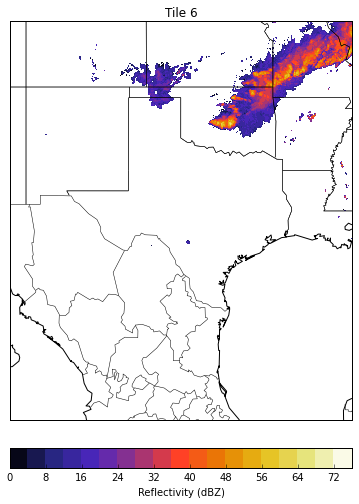

In [7]:
fig = plt.figure(figsize=(8,8))
display.plot_horiz(level=4.1, verbose=True, latrange=[40,20], lonrange=[-90,-110], 
                   save='tile6.png', clevs=4.0*np.arange(20), cmap='CMRmap', show_grid=False, 
                   title='Tile 6')

Note how you can screw up the order of the lat/lonrange variables, take the cross-section thru the wrong altitude, etc. MMM-Py will figure it out.

What about plot_vert()?

In [8]:
help(display.plot_vert)

Help on method plot_vert in module mmmpy:

plot_vert(self, var='mrefl3d', lat=None, lon=None, xrange=None, xlabel=None, colorbar_flag=True, zrange=None, zlabel='Height (km MSL)', fig=None, ax=None, clevs=array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,... 40.,  45.,  50.,
        55.,  60.,  65.,  70.]), cmap=<matplotlib.colors.LinearSegmentedColormap object>, title=None, save=None, verbose=False, return_flag=False) method of mmmpy.MosaicDisplay instance
    Plots a vertical cross-section through mosaic radar data.
    var = Variable to be plotted.
    lat/lon = If set, performs vertical cross-section thru that lat/lon,
              or as close as possible to it. Only one or the other
              can be set.
    xrange = Desired latitude or longitude range of plot (2-element list).
    zrange = Desired height range of plot (2-element list).
    xlabel, zlabel = Axes labels.
    clevs = Desired contour levels.
    cmap = Desired color map.
    title = String for plot title, None = Ba

Similar in concept, but now you can do vertical cross-sections along either constant latitude or constant longitude. You can customize most everything. Let's see it in action.

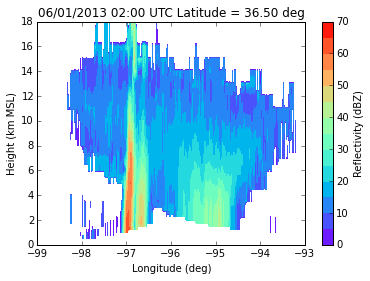

In [9]:
display.plot_vert(lat=36.5, xrange=[-99,-93], cmap='rainbow')

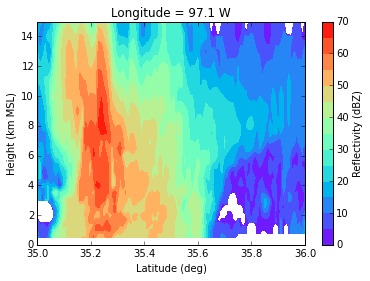

In [10]:
display.plot_vert(lon=-97.1, xrange=[35,36], cmap='rainbow', zrange=[0,15], 
                  title='Longitude = 97.1 W')

There is a third plotting method, three_panel_plot(), which combines a plan view, a constant latitude vertical cross-section, and a constant longitude vertical cross-section.

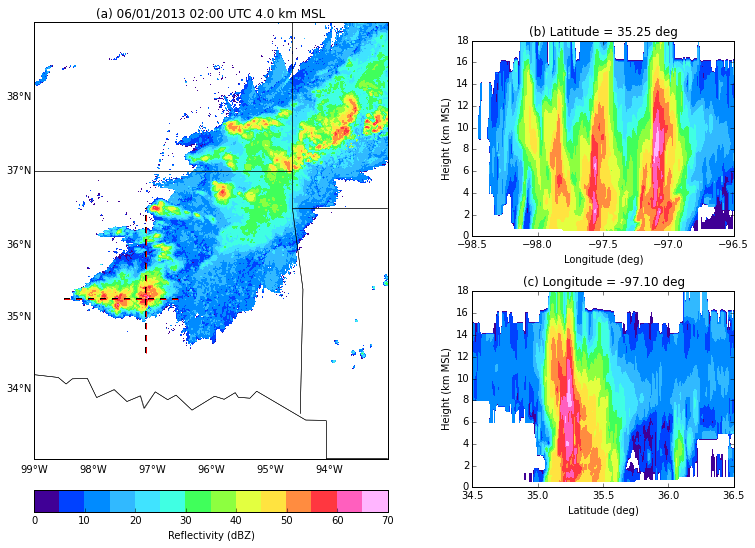

In [11]:
display.three_panel_plot(lat=35.25, lon=-97.1, latrange=[33,39], lonrange=[-99,-93], level=4,
                         meridians=1, parallels=1, xrange_b=[-98.5, -96.5], xrange_c=[34.5, 36.5])

Like the other two plotting methods, there are keywords to customize the appearance of these plots (including turning off the crosshairs, show_crosshairs=False). At the same time, just about everything but lat and lon are optional. (MMM-Py needs to know where to do the vertical cross-sections!) If xrange_b and xrange_c are not set they default to latrange and lonrange (and if those are not set, then the entire US domain will be plotted). 

At any rate, while these plotting methods are powerful enough to produce publication-quality plots, they really shine for quickly and interactively inspecting these mosaics.

### Stitching Tiles Together

OK, that's great, I can read in and plot individual tiles. But storms don't care about arbitrary domain boundaries. That El Reno storm extended out of Tile 6. How do we deal with that? Enter the MosaicStitch class, a child class of MosaicTile. Using the standalone MMM-Py function stitch_mosaic_tiles(), we can quickly produce a MosaicStitch class from a starting set of individual MosaicTiles.

In [12]:
map_array_a = [ [tile1a, tile2a, tile3a, tile4a], [tile5a, tile6a, tile7a, tile8a] ]
stitch_a = mmmpy.stitch_mosaic_tiles(map_array=map_array_a, verbose=True)


********************
stitch_mosaic_tiles():
Sent a 2-D matrix, attempting to stitch in both N-S and E-W directions

********************
stitch_ns():
Stitching mrefl3d
Completed normally
********************


********************
stitch_ns():
Stitching mrefl3d
Completed normally
********************


********************
stitch_we():
Completed normally
********************


********************
stitch_ns():
Stitching mrefl3d
Completed normally
********************


********************
stitch_we():
Completed normally
********************


********************
stitch_ns():
Stitching mrefl3d
Completed normally
********************


********************
stitch_we():
Completed normally
********************

Task complete, data contained as class attributes
Use dir(), help(), or __dict__ to find out what is available
********************



Wow, that was a lot of text, though not setting verbose to True will avoid all that. But it helps show you what is going on. The key here is map_array. This is how you tell stitch_mosaic_tiles() the arrangement of the tiles. In the above case, map_array was a 2-D list. For Version 1 mosaics, Tiles 1-4 form the northern half of the US (increasing from west to east), while Tiles 5-8 are the southern half. So map_array was arranged in a similar way - map_array[0][0] is the upper northwest, map_array[0][3] the upper northeast, map_array[1][0] the lower southwest, and so on.

Then the stitch_mosaic_tiles() function iteratively calls the actual stitching methods (stitch_ns and stitch_we), which are part of every MosaicStitch class, based on the arrangement of map_array. These methods essentially merge all the attributes from each MosaicTile together in a coherent manner. The end result, a MosaicStitch, will have essentially the same data model as before, but simply cover a larger region.

To be more specific, in the above case Tiles 1 and 5 were stitched in the NS direction, then tiles 2 and 6 were stitched in the same direction, then these MosaicStitch classes were stitched in the WE direction. Afterward, Tiles 3 and 7 were stitched (NS), then that combined (WE) with the 4-tile stitch from before. Finally, we merge Tiles 4 and 8 (NS), then stitch again with the 6-Tile MosaicStitch to form a full 8-tile MosaicStitch.

See the help below for more.

In [13]:
help(mmmpy.stitch_mosaic_tiles)

Help on function stitch_mosaic_tiles in module mmmpy:

stitch_mosaic_tiles(map_array=None, direction=None, verbose=False)
    Standalone function for stitching.
    Interprets map_array, a 1- or 2-rank list containing MosaicTile class
    instances arranged in proper locations. If there is not a tile
    (determined by checking for the mrefl3d attribute), then no attempt will be
    made to stitch. This method does some simple error checks to avoid problems
    but the user is primarily responsible for not inputing garbage.
    After that, it will iteratively call MosaicStitch.stitch_ns() and
    MosaicStitch.stitch_we() to do the heavy lifting.
    direction = Expected to be a string showing which direction to stitch
                (we or ns), and is only used if this function is sent a
                1-D map_array.
    Returns a MosaicStitch() class containing every tile provided in map_array,
    with each tile located where map_array told it to be.
    This function is standalone

Since a MosaicStitch class is a child of MosaicTile, it has access to all of the usual goodies, including plots (via MosaicDisplay).

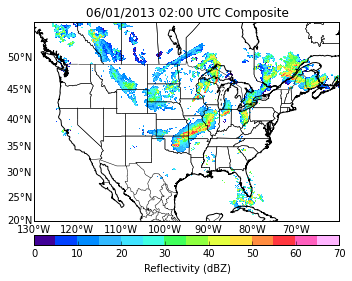

In [14]:
display_a = mmmpy.MosaicDisplay(stitch_a)
display_a.plot_horiz(parallels=5)

There ya go! Now, these national plots can take some time to produce. But we can zoom in on the entirety of the El Reno storm.

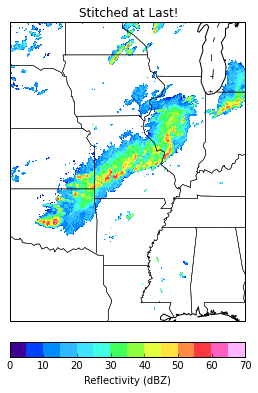

In [15]:
fig = plt.figure(figsize=(6,6))
display_a.plot_horiz(level=4, latrange=[30, 45], lonrange=[-85, -100], 
                     show_grid=False, title='Stitched at Last!')

What if we just want to focus on a couple tiles? Do we really have to read in and stitch up the entire U.S.? Good news, you don't! Let's just stitch together Tiles 6 and 7.

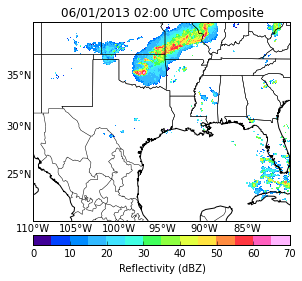

In [16]:
stitch_small = mmmpy.stitch_mosaic_tiles(map_array=[tile6a, tile7a], direction='we')
small_display = mmmpy.MosaicDisplay(stitch_small)
small_display.plot_horiz(latrange=[np.min(stitch_small.Latitude),
                                   np.max(stitch_small.Latitude)],
                         lonrange=[np.min(stitch_small.Longitude),
                                   np.max(stitch_small.Longitude)],
                         meridians=5, parallels=5)

The direction keyword is needed when doing a 1-D map_array. It tells MMM-Py which way to stitch (e.g., whether to use the stitch_ns or stitch_we methods). It is a string and is pretty forgiving - 'we', 'eW', 'W', etc. will all work to tell MMM-Py to stitch in the west-east direction. The analog for north-south is direction='ns', 'sN', 'S', 'n', etc. 

But what about just a smaller region, but still using a 2-D map_array? Go for it!

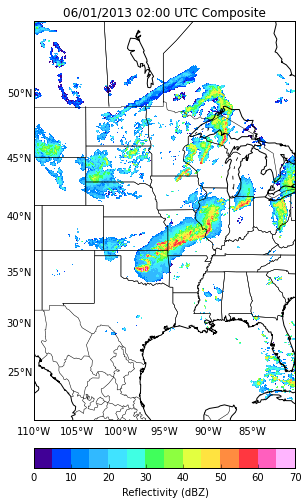

In [17]:
fig = plt.figure(figsize=(8, 8))
stitch_small = mmmpy.stitch_mosaic_tiles(map_array=[[tile2a, tile3a], [tile6a, tile7a]])
small_display = mmmpy.MosaicDisplay(stitch_small)
small_display.plot_horiz(latrange=[np.min(stitch_small.Latitude),
                                   np.max(stitch_small.Latitude)],
                         lonrange=[np.min(stitch_small.Longitude),
                                   np.max(stitch_small.Longitude)],
                         meridians=5, parallels=5)

Again, since mosaics are structured N to S, and W to E, map_array needs to be arranged the same way. First element(s) are assumed to be the westernmost/northernmost. In a 2-D map_array, the first row is the northern half and the second is the southern half. But beyond that, the user has full control - you can stitch Tiles 2 and 6 together (NS). You can stitch Tiles 1-3 together (WE), you can leave off Tiles 1 and Tile 5 (i.e., the West Coast) and stitch everything else together, whatever you want.

### Newer Mosaics

OK, you say, but the new (Version 2) MRMS mosaics are totally different! NSSL changed the format and broke all your existing software. Not to worry, this will be basically transparent to an MMM-Py user. Just convert the new binary-format mosaics to NetCDF using MRMS_to_CFncdf (available from NOAA). Then, behold ...

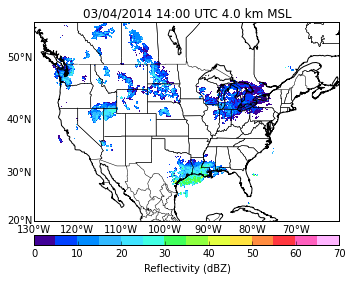

In [18]:
tile1b = mmmpy.MosaicTile(path + './V2_MRMS_Data/tile1/20140304-140000.netcdf')
tile2b = mmmpy.MosaicTile(path + './V2_MRMS_Data/tile2/20140304-140000.netcdf')
tile3b = mmmpy.MosaicTile(path + './V2_MRMS_Data/tile3/20140304-140000.netcdf')
tile4b = mmmpy.MosaicTile(path + './V2_MRMS_Data/tile4/20140304-140000.netcdf')
map_array_b = [[tile1b, tile2b], [tile3b, tile4b]]
stitch_b = mmmpy.stitch_mosaic_tiles(map_array_b)
display = mmmpy.MosaicDisplay(stitch_b)
display.plot_horiz(level=4)

Note how I didn't really change much to read in the tiles, stitch them together, and then plot. The Version 2 mosaics are broken into 4 tiles instead of 8, but otherwise there's not much else to keep track of. MMM-Py does that for you. MMM-Py's data model is constant regardless of whether Version 1 or Version 2 data are being used. And MMM-Py will be easily configurable to maintain essentially the same data model once NOAA starts distributing national mosaics of dual-pol variables. See below for an example.

In [19]:
print(tile1b.Filename)
print(tile1b.Version)
print(tile1b.Variables)
print(tile1b.nlat, tile1b.nlon, tile1b.nz)
print(tile1b.StartLat, tile1b.StartLon, tile1b.LatGridSpacing, tile1b.LonGridSpacing)
print(tile1b.Time, tile1b.Duration)

20140304-140000.netcdf
2
['mrefl3d']
(1750, 3500, 33)
(54.994999, -129.995, 0.0099999998, 0.0099999998)
(1393941600.0, 120.0)


So while the new mosaic tiles are different (more vertical levels, 2-min resolution, larger area, etc.), MMM-Py can properly account for all this. The user doesn't need to bother revamping their code every time NOAA releases a new Mosaic version.

### Reading Gzipped Binary Mosaics

What's that, you say? Converting the binary mosaics to NetCDF is a total drag? Well, OK then. Just read the gzipped binaries directly! It takes bit longer than reading a NetCDF, but considering the time and trouble it takes to uncompress, convert, re-compress, and find disk space for the new NetCDF you just created, you will come out ahead going the binary read route. Make sure they are compressed the usual gzip way.


********************
read_mosaic_binary():
Reading /Users/tjlang/Documents/Python/DataForTesting/binary/MREF3D33L_tile2.20140619.010000.gz
15.7586860657 seconds to complete
********************



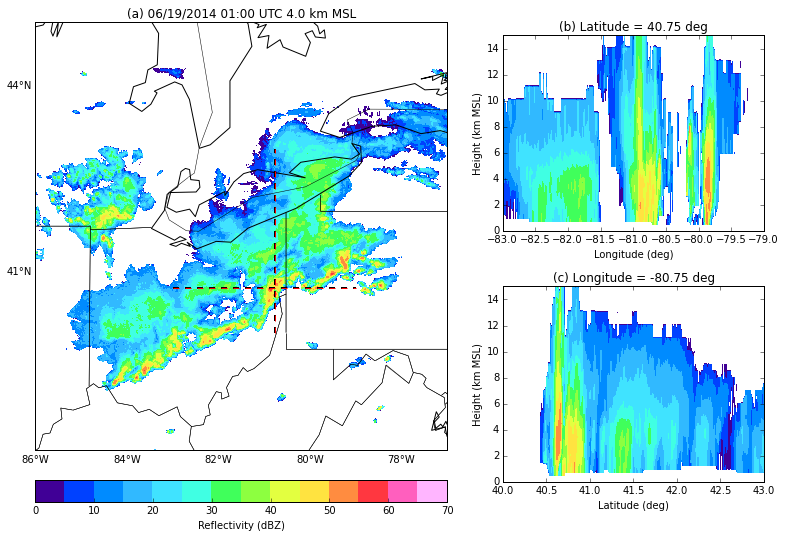

In [20]:
file_dir = '/Users/tjlang/Documents/Python/DataForTesting/binary/'
tile2 = mmmpy.MosaicTile(file_dir+'MREF3D33L_tile2.20140619.010000.gz', verbose=True)
d2 = mmmpy.MosaicDisplay(tile2)
d2.three_panel_plot(lat=40.75, lon=-80.75, latrange=[38, 45], 
                    lonrange=[-86, -77], meridians=2, parallels=3, xrange_b=[-83, -79], 
                    xrange_c=[43, 40], show_grid=True, zrange=[0,15], level=4)

Now what do you say? The MRMS format changed AGAIN, and now they are being distributed as totally different grib2 files? Well that is the subject of the other notebook (Grib_Read_Demo.ipynb). Check it out!

I'll end this notebook by printing out all the docstrings from MMM-Py. Enjoy!

In [21]:
help(mmmpy)

Help on module mmmpy:

NAME
    mmmpy

FILE
    /Users/tjlang/Documents/Python/mmmpy/mmmpy.py

DESCRIPTION
    Title/Version
    -------------
    Marshall MRMS Mosaic Python Toolkit (MMM-Py)
    mmmpy v1.5
    Developed & tested with Python 2.7 & 3.4
    Last changed 07/31/2015
    
    
    Author
    ------
    Timothy Lang
    NASA MSFC
    timothy.j.lang@nasa.gov
    (256) 961-7861
    
    
    Overview
    --------
    This python script defines a class, MosaicTile, which can be
    populated with data from a NOAA MRMS mosaic tile file containing
    mosaic reflectivities on a national 3D grid. Simple diagnostics and plotting
    (via the MosaicDisplay class), as well as computation of composite
    reflectivity, are available. A child class, MosaicStitch, is also defined.
    This can be populated with stitched-together MosaicTiles. To access these
    classes, add the following to your program and then make sure the path to
    this script is in your PYTHONPATH:
    import mmm